In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Libraries

In [6]:
import pandas as pd
import numpy as np
from time import time
import time
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,  precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


## Import the Dataset

Having the train dataset whith no column name, we are going to use the one from the "kddcup.names.txt" dataset

In [7]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cybercrime/kddcup.data_10_percent_corrected", header=None, names = col_names)

In [8]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


We visualise a summary of the DataFrame, train_data, with the **info** method.

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

Of our 41 variables, 4 are classified as object, 22 has int64 and 15 has float64.

## Missing values and duplicates

In [10]:
missing_values_count = train_data.isnull().sum()
print("Missing values in each column:")
missing_values_count

Missing values in each column:


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
train_data.duplicated().sum()

348435

There are no missing values, and we cannot drop for the duplicates since there is no unique values that differentiate in order to see if they are the same.

## EDA

In order to understand better our dataset we are going to plot firstly the categorical variables, so to understand what they represent.

From the below graph we see the distribution of the protocol type. We notice that the most common "protocol type" is "icmp".

<ipython-input-8-8da006625339>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='protocol_type', data= train_data, order= sorted_protocol_types, palette='Set2')


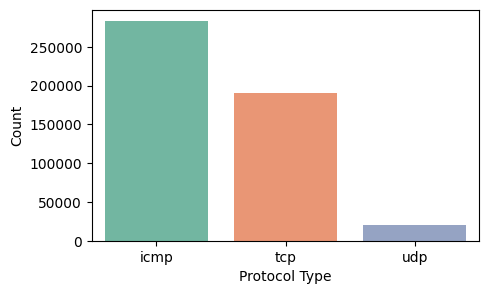

In [ ]:
#Plot the protocol type variable

sorted_protocol_types = train_data['protocol_type'].value_counts().index #sort the data

plt.figure(figsize=(5,3))

sns.countplot(x='protocol_type', data= train_data, order= sorted_protocol_types, palette='Set2')

plt.xlabel('Protocol Type')
plt.ylabel('Count')

plt.show()

In order to have a better visualization of the "service" column we divide it in 3 parts, each one with different values based on their lenght.

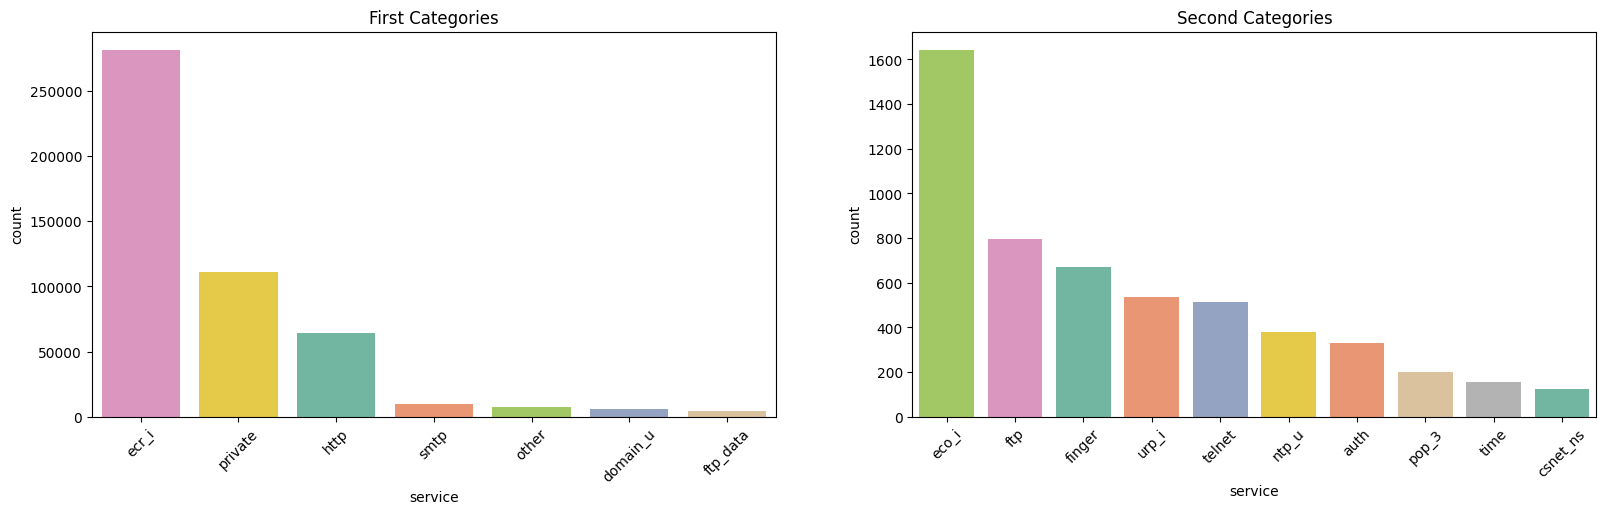

In [34]:
#Plot the Service variable

label_counts = train_data['service'].value_counts() #order the values based on their lenght
label_large = label_counts[label_counts > 2100].index.tolist() #first graph
label_medium = label_counts[(label_counts <= 2100) & (label_counts > 120)].index.tolist() #second graph
label_small = label_counts[label_counts <= 120].index.tolist() #third graph

# Define the figure with subplots
plt.figure(figsize=(30, 5))

# First subplot
plt.subplot(1, 3, 1)
sns.countplot(x='service', hue='service', data=train_data[train_data['service'].isin(label_large)], order=label_large, palette='Set2', legend=False)
plt.title('First Categories')
plt.xticks(rotation=45)

# Second subplot
plt.subplot(1, 3, 2)
sns.countplot(x='service', hue='service',data=train_data[train_data['service'].isin(label_medium)], order=label_medium, palette='Set2', legend=False)
plt.title('Second Categories')
plt.xticks(rotation=45)


plt.show()

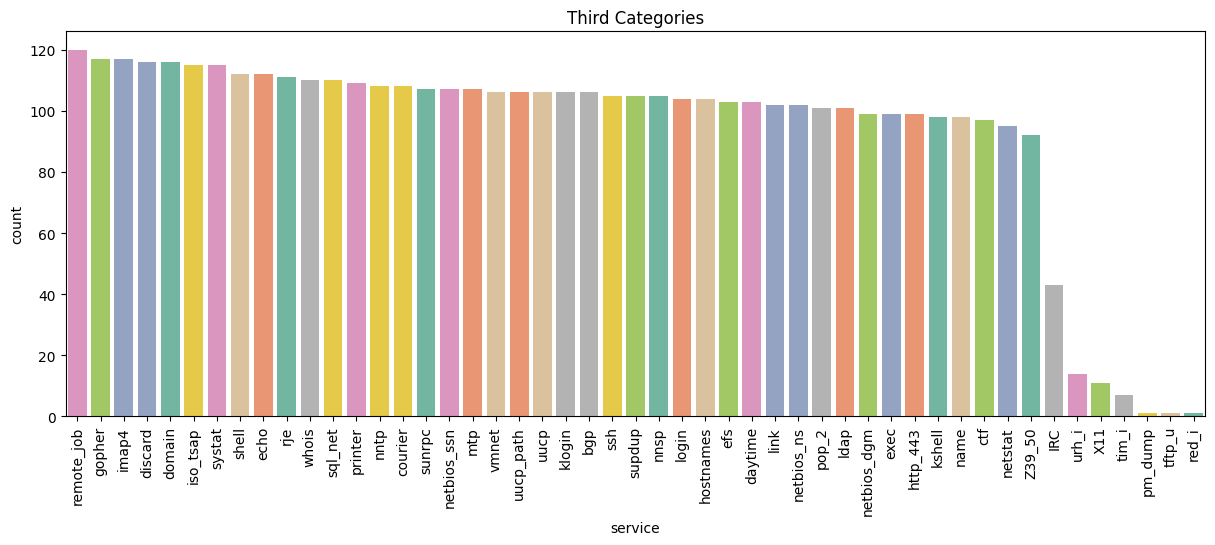

In [36]:
#Third plot of the service variable, is divide from the others in order to visualise it better

plt.figure(figsize=(50, 5))

# Third subplot
plt.subplot(1, 3, 3)
sns.countplot(x='service', hue='service', data=train_data[train_data['service'].isin(label_small)], order=label_small, palette='Set2', legend=False)
plt.title('Third Categories')
plt.xticks(rotation=90)

plt.show()

As we have done before, we divide the "flag" column in 3 parts to have a better visualization.

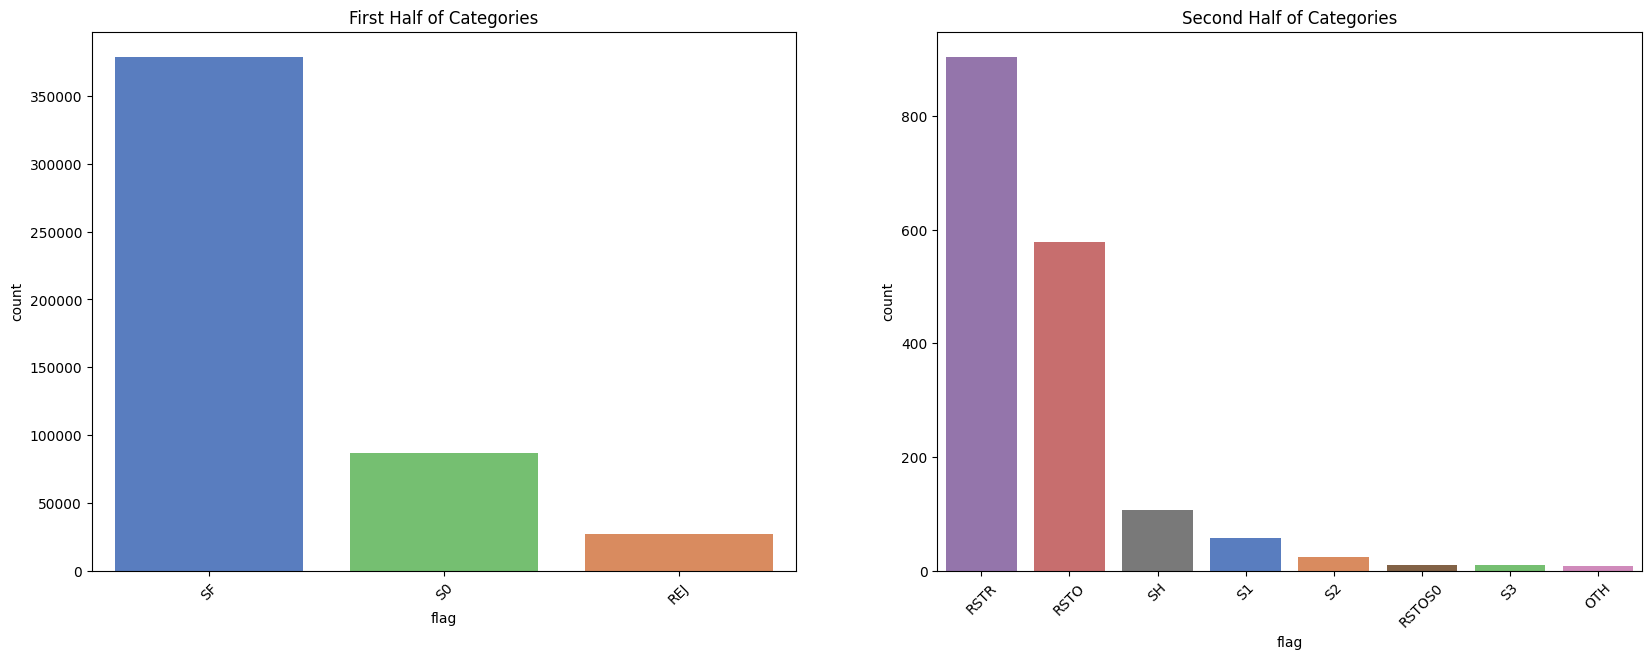

In [33]:
#Plot the flag variable
flag_counts = train_data['flag'].value_counts()
flag_large = flag_counts[flag_counts > 25000].index.tolist()
flag_small = flag_counts[flag_counts <= 25000].index.tolist()


plt.figure(figsize=(20, 7))

#First subplot
plt.subplot(1, 2, 1)
sns.countplot(x='flag', hue= 'flag', data=train_data[train_data['flag'].isin(flag_large)], order=flag_large, palette = 'muted', legend=False)
plt.title('First Half of Categories')
plt.xticks(rotation=45)

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='flag', hue='flag', data=train_data[train_data['flag'].isin(flag_small)], order=flag_small, palette = 'muted', legend=False)
plt.title('Second Half of Categories')
plt.xticks(rotation=45)

plt.show()

We have divided the graph in three subplot, so to have the same numeric order for a better clarity and understanding

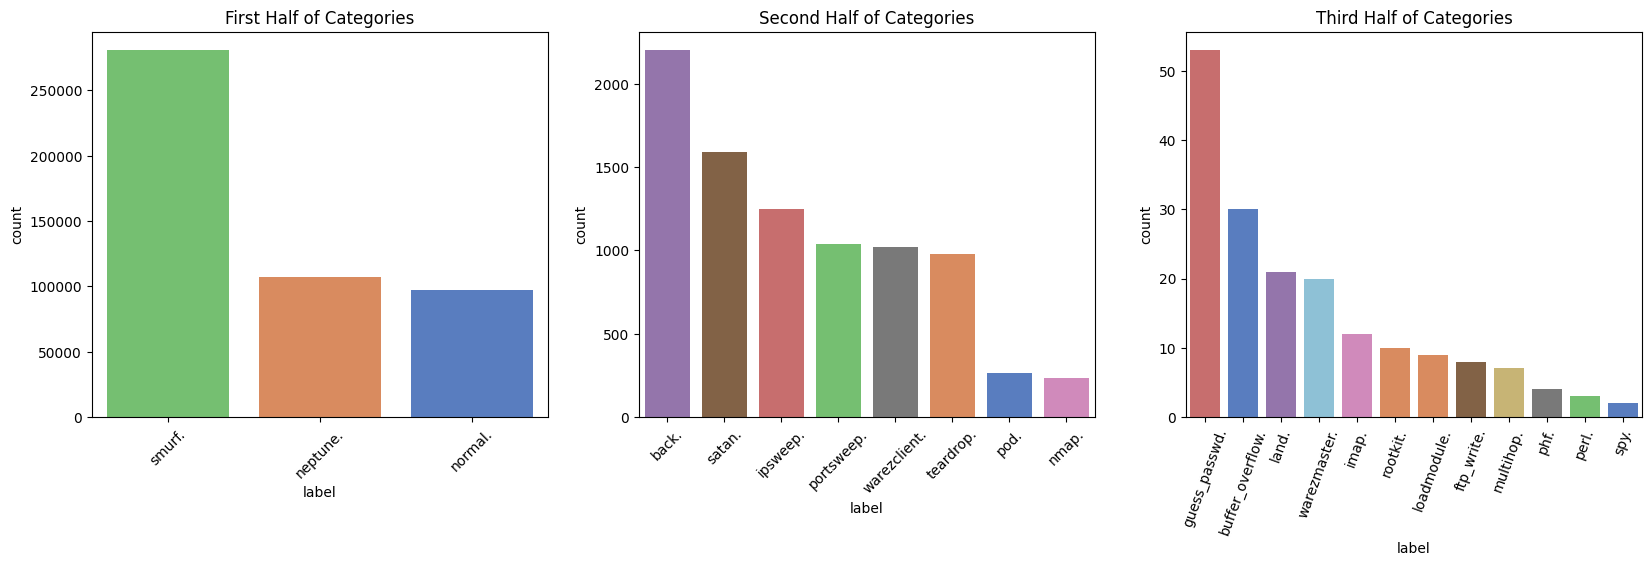

In [31]:
#Plot the label variable

label_counts = train_data['label'].value_counts() #order the values based on their lenght
label_large = label_counts[label_counts > 50000].index.tolist() #first graph
label_medium = label_counts[(label_counts <= 50000) & (label_counts > 200)].index.tolist() #second graph
label_small = label_counts[label_counts <= 200].index.tolist() #third graph

# Define the figure with subplots
plt.figure(figsize=(20, 5))

# First subplot
plt.subplot(1, 3, 1)
sns.countplot(x='label', hue='label', data=train_data[train_data['label'].isin(label_large)], order=label_large, palette = 'muted',  legend=False)
plt.title('First Half of Categories')
plt.xticks(rotation=45)

# Second subplot
plt.subplot(1, 3, 2)
sns.countplot(x='label', hue='label', data=train_data[train_data['label'].isin(label_medium)], order=label_medium, palette = 'muted', legend=False)
plt.title('Second Half of Categories')
plt.xticks(rotation=45)

# Third subplot
plt.subplot(1, 3, 3)
sns.countplot(x='label', hue='label', data=train_data[train_data['label'].isin(label_small)], order=label_small, palette = 'muted', legend=False)
plt.title('Third Half of Categories')
plt.xticks(rotation=70)

plt.show()

### After we have analysed the categorical variables, we move on to the numeric one.
Firstly we are going to visualise them and understand which are the most importants, thus we will investigate them.

Lets get an overview of the data

In [ ]:
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


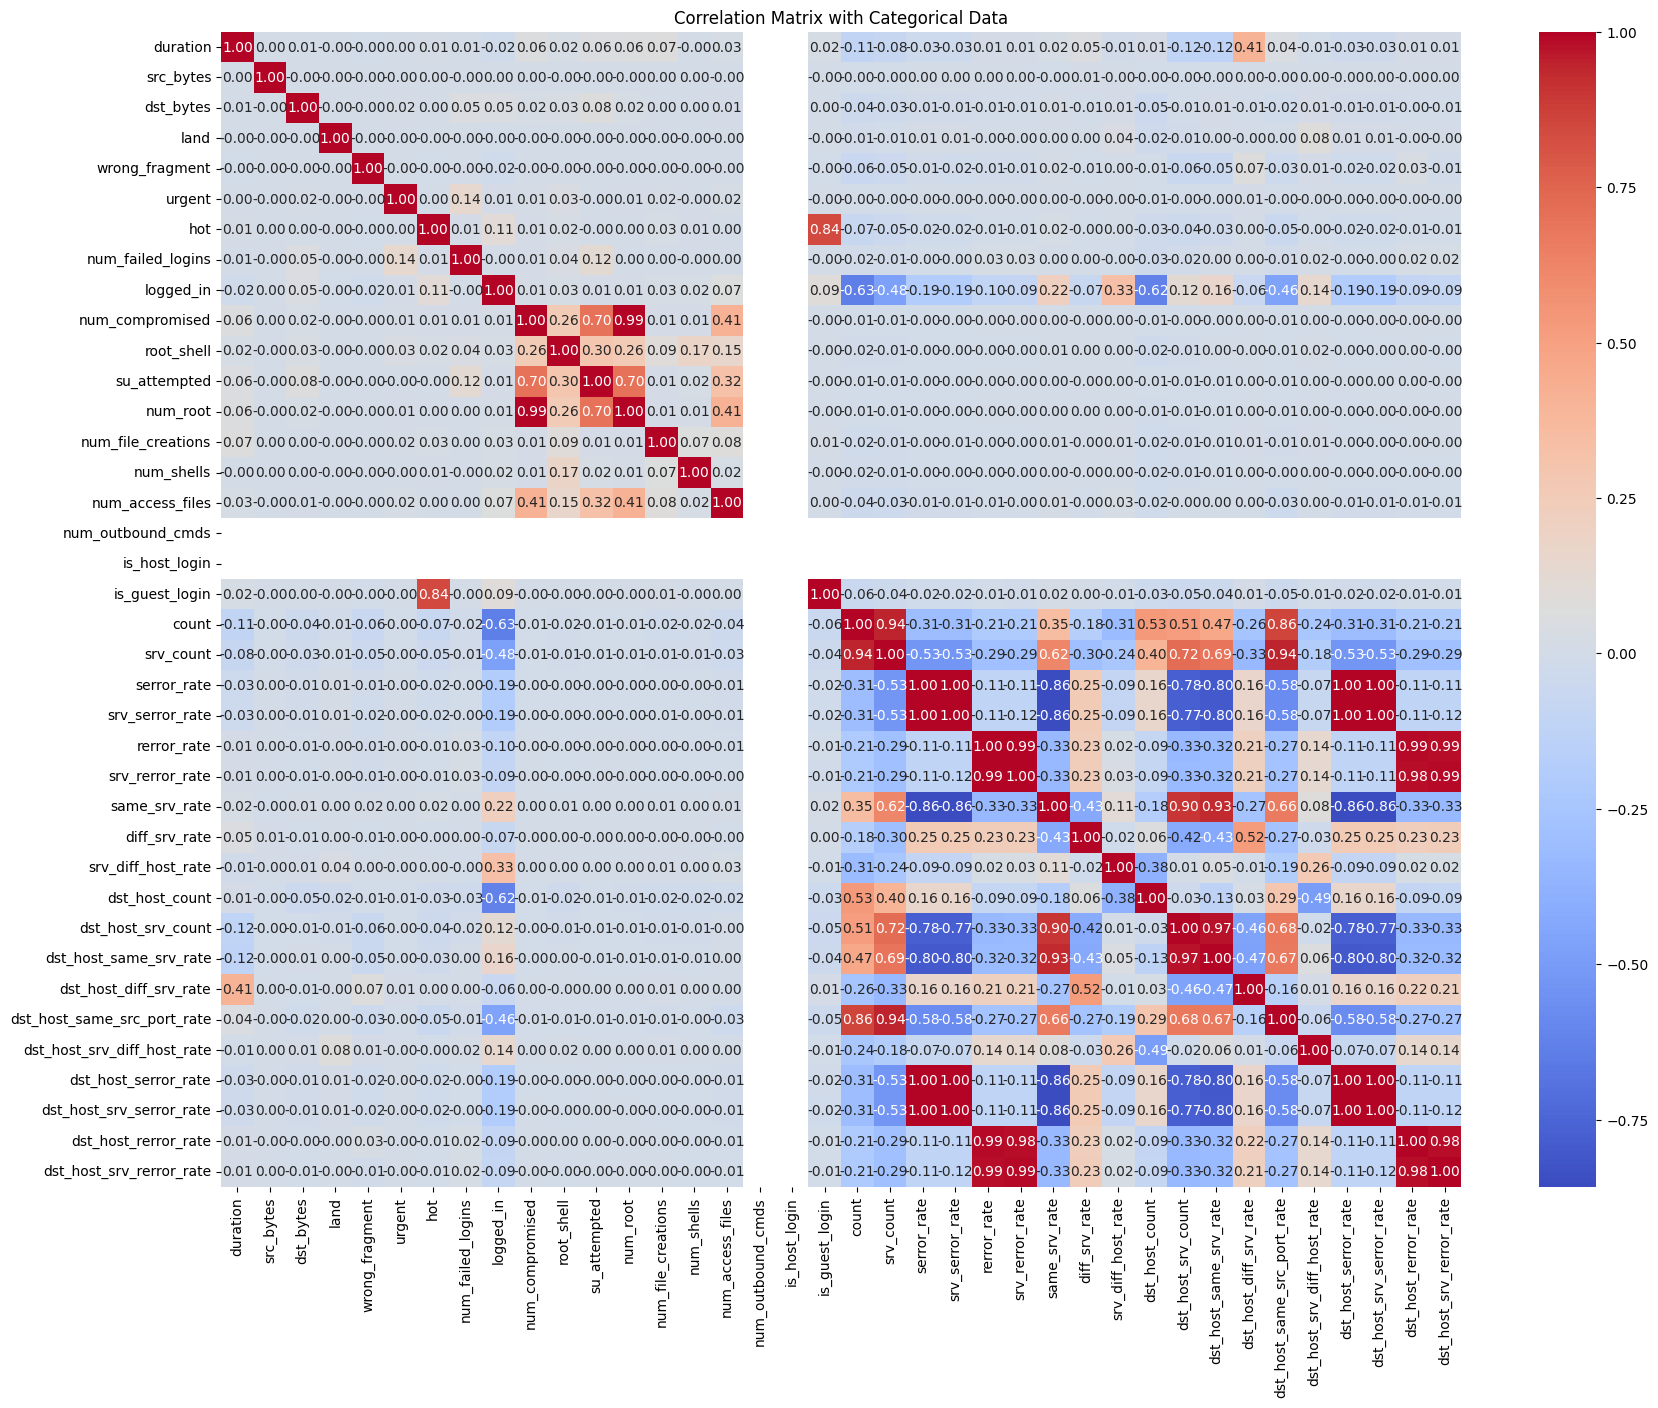

In [ ]:
data_num = train_data
columns_to_drop = ['protocol_type','service', 'flag','label' ]

# Drop the specified columns
data_num = data_num.drop(columns=columns_to_drop, axis=1)

correlation_matrix_encoded = data_num.corr()

# Visualize the new correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix_encoded, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix with Categorical Data')
plt.show()

From the correlation matrix above, we are going to analyse some of the most correlated data and see what they represent.

### Analysis of the features

In [ ]:
train_data['is_host_login'].value_counts()

is_host_login
0    494021
Name: count, dtype: int64

In [ ]:
train_data['num_outbound_cmds'].value_counts()

num_outbound_cmds
0    494021
Name: count, dtype: int64

In [ ]:
#train_data = train_data.drop('num_outbound_cmds', axis=1) #drop the features

Import the corretced dataset, it is going to be utilise as test set

In [38]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate", "label"]

corrected_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cybercrime/corrected',  header=None, names = col_names)

Visualise the corrected data set

In [40]:
corrected_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311025,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311026,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311027,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
corrected_data['num_outbound_cmds'].value_counts()

num_outbound_cmds
0    311029
Name: count, dtype: int64

From the correlation map, the variables 'is_host _login' and 'num_outbound_cmds'caught our attention, so we decidedto analysed them and found out that they are composed only by 0. At this time we thought of dropoing them, since they do not add any values to out analysis, but we firstly checked the test set to see how there are composed.

With this check we discovered that 'num_outbound_cmds' is also composed by all zeros in the test set  The latter being all zero also in the test set, so we are going to drop it being not helpful to our analysis.

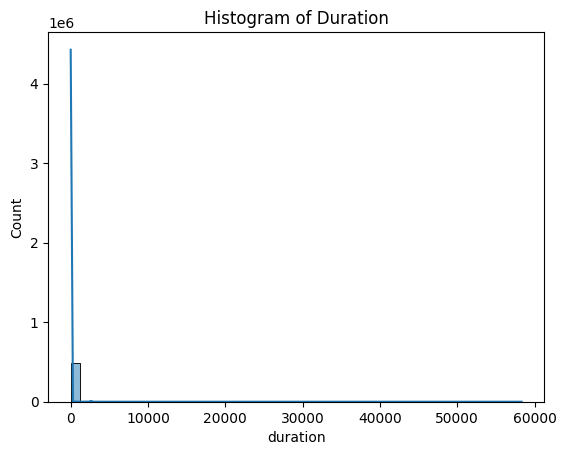

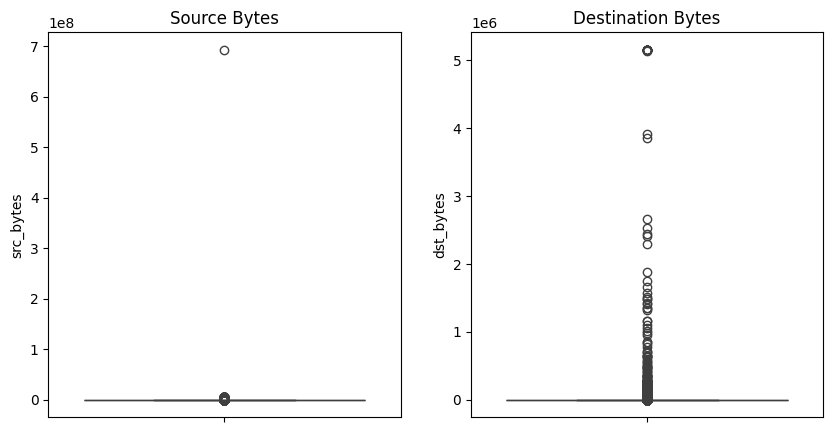

In [ ]:
# Histogram of duration
sns.histplot(train_data['duration'], bins=50, kde=True)
plt.title('Histogram of Duration')
plt.show()

# Box plot for src_bytes and dst_bytes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=train_data['src_bytes'])
plt.title('Source Bytes')

plt.subplot(1, 2, 2)
sns.boxplot(y=train_data['dst_bytes'])
plt.title('Destination Bytes')
plt.show()

The low correlations mean that each of these features independently contributes information to the dataset, which could be useful for building a predictive model since they don’t redundantly carry the same information.

### Hot and is_guest_login

In [ ]:
train_data['hot'].value_counts()

hot
0     490829
2       2192
28       274
1        256
4        112
6        104
5         51
3         38
14        37
30        28
22        28
19        23
24        13
18        13
20        10
7          5
17         2
12         2
16         1
10         1
15         1
9          1
Name: count, dtype: int64

In [ ]:
train_data['is_guest_login'].value_counts()

is_guest_login
0    493336
1       685
Name: count, dtype: int64

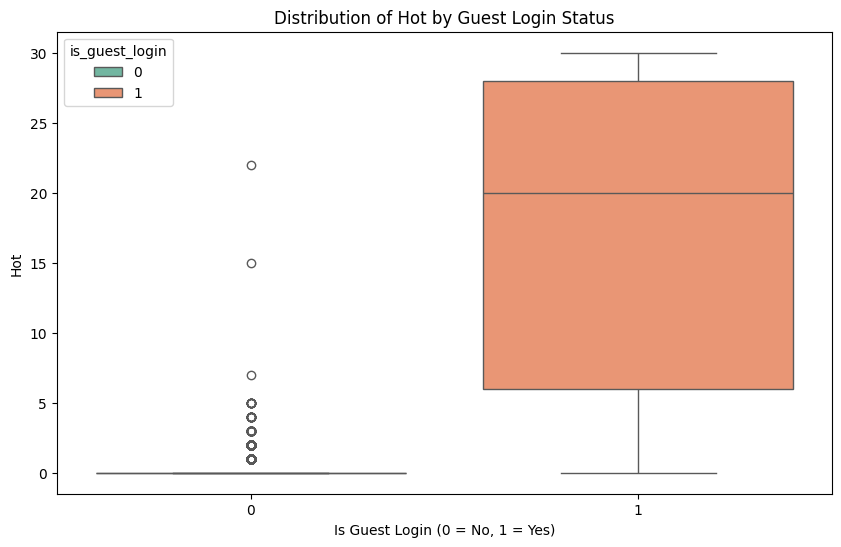

In [44]:
# Plot hot' and 'is_guest_login'
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_guest_login', hue='is_guest_login', y='hot', data=train_data, palette='Set2')
plt.title('Distribution of Hot by Guest Login Status')
plt.xlabel('Is Guest Login (0 = No, 1 = Yes)')
plt.ylabel('Hot')
plt.show()

### Srv_count and Count

The following variables represents:

- *count*: Refers to the number of connections to the same host as the current connection in the past two seconds. It includes connections that were initiated or received by the host, and can be an indicator of the frequency or volume of traffic directed at a host within a very short timeframe.

- *srv_count*: Refers to the number of connections to the same service as the current connection in the past two seconds. Unlike count, which is focused on connections per host, srv_count is specific to the service type, providing insight into the concentrated use or potential targeting of specific services.

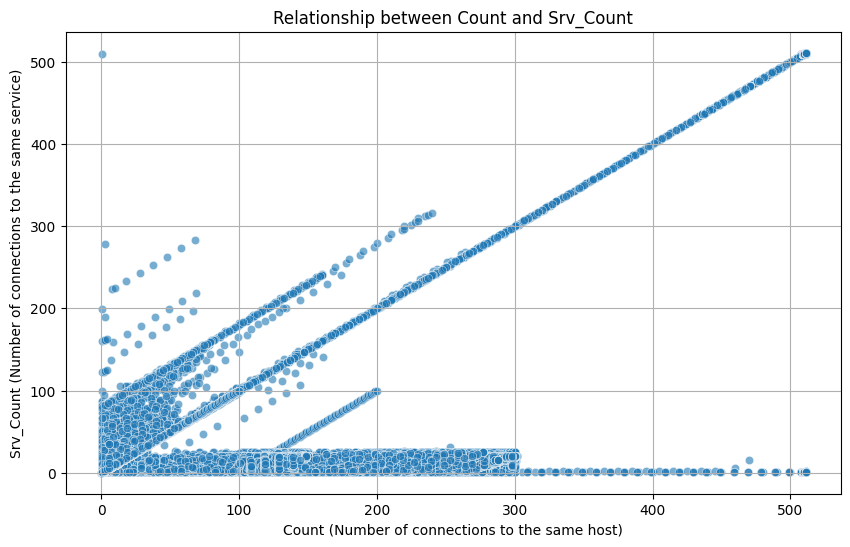

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='count', y='srv_count', data=train_data, alpha=0.6)
plt.title('Relationship between Count and Srv_Count')
plt.xlabel('Count (Number of connections to the same host)')
plt.ylabel('Srv_Count (Number of connections to the same service)')
plt.grid(True)
plt.show()


### Num_compromised, su_attempted, and num_root

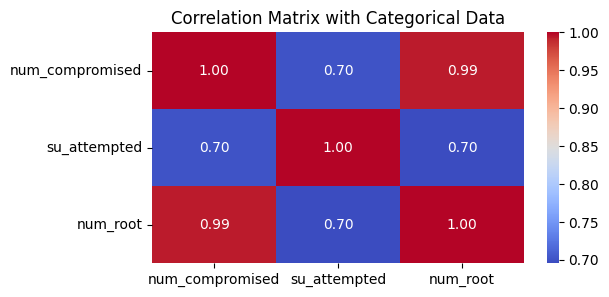

                 num_compromised  su_attempted  num_root
num_compromised         1.000000      0.701400  0.993828
su_attempted            0.701400      1.000000  0.695603
num_root                0.993828      0.695603  1.000000


In [ ]:
# Extract correlations relevant to 'num_compromised', 'su_attempted', and 'num_root'
specific_corrs = correlation_matrix_encoded.loc[['num_compromised', 'su_attempted', 'num_root'],
                                        ['num_compromised', 'su_attempted', 'num_root']]

# New heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(specific_corrs, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix with Categorical Data')
plt.show()
print(specific_corrs)

In [ ]:
train_data['num_compromised'].value_counts()

num_compromised
0      491797
1        2151
2          24
4          16
3          11
6           3
5           2
7           2
767         1
12          1
9           1
884         1
13          1
38          1
18          1
11          1
275         1
281         1
16          1
238         1
21          1
22          1
102         1
Name: count, dtype: int64

In [ ]:
train_data['su_attempted'].value_counts()

su_attempted
0    494009
1         6
2         6
Name: count, dtype: int64

In [ ]:
train_data['num_root'].value_counts()

num_root
0      493436
1         233
9         167
6         126
2          22
5          12
4          10
3           3
7           1
993         1
54          1
306         1
14          1
39          1
278         1
268         1
12          1
857         1
16          1
119         1
Name: count, dtype: int64

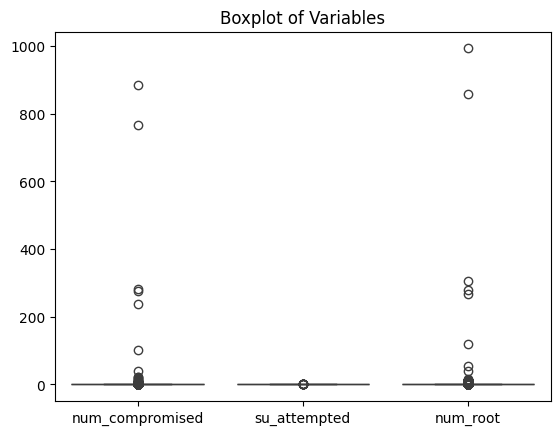

In [ ]:
sns.boxplot(data=train_data[['num_compromised', 'su_attempted', 'num_root']])
plt.title('Boxplot of Variables')
plt.show()

### Rerror_rate, Srv_rerror_rate, Dst_host_rerror_rate and Dst_host_srv_rerror_rate

From the correlation matrix we saw that this features were higlhy correlated, so we decided to investigate further.
Firstly let's understand what do they mean.
- *rerror_rate*: This typically represents the rate of connection errors from the source side.
- *srv_rerror_rate*: This is specifically measuring errors related to the source, perhaps in a more direct or specific measurement.

On the other hand we have the:
- *dst_host_rerror_rate*: This measures the rate of connection errors seen from the destination host.
- *dst_host_srv_rerror_rate*: This rate is specific to the destination host but focuses on the service (or server) level.

Already from this short description their correlation starts to emerge.

In [ ]:
train_data['rerror_rate'].value_counts()

rerror_rate
0.00    464948
1.00     26979
0.86       113
0.87       102
0.92        97
         ...  
0.66         1
0.31         1
0.32         1
0.34         1
0.24         1
Name: count, Length: 77, dtype: int64

In [ ]:
train_data['srv_rerror_rate'].value_counts()

srv_rerror_rate
0.00    464320
1.00     28116
0.33       252
0.50       201
0.25       173
0.20       143
0.17       128
0.14        73
0.04        63
0.03        61
0.12        57
0.06        54
0.02        54
0.05        41
0.07        36
0.40        30
0.67        28
0.08        28
0.11        26
0.29        25
0.09        24
0.10        16
0.75        11
0.60        11
0.01         6
0.71         4
0.22         4
0.83         3
0.86         3
0.18         2
0.96         2
0.79         2
0.43         2
0.92         2
0.81         2
0.88         2
0.73         2
0.69         1
0.94         1
0.62         1
0.80         1
0.85         1
0.93         1
0.82         1
0.27         1
0.37         1
0.21         1
0.38         1
0.87         1
0.95         1
0.13         1
Name: count, dtype: int64

In [ ]:
train_data['dst_host_rerror_rate'].value_counts()

dst_host_rerror_rate
0.00    458792
1.00     26040
0.01      1596
0.02       932
0.04       801
         ...  
0.63        19
0.34        18
0.46        15
0.39        14
0.79        13
Name: count, Length: 101, dtype: int64

In [ ]:
train_data['dst_host_srv_rerror_rate'].value_counts()

dst_host_srv_rerror_rate
0.00    459805
1.00     25695
0.01      1851
0.04       830
0.02       783
         ...  
0.23         6
0.32         5
0.28         4
0.26         4
0.22         4
Name: count, Length: 101, dtype: int64

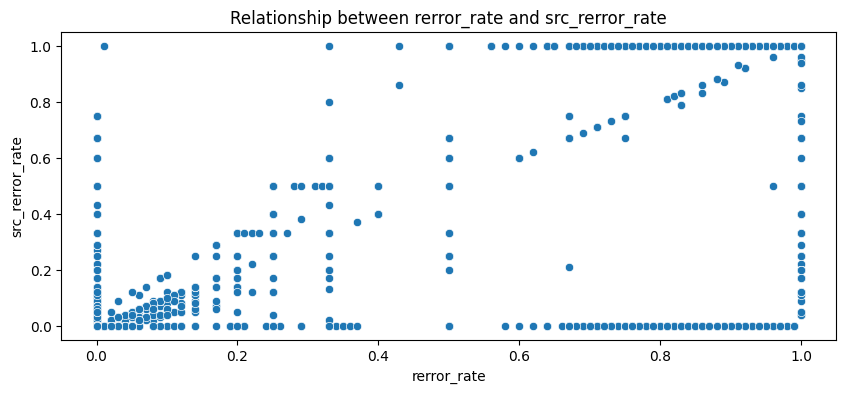

In [ ]:
# Scatter plot for rerror_rate vs src_rerror_rate
plt.figure(figsize=(10, 4))
sns.scatterplot(x='rerror_rate', y='srv_rerror_rate', data=train_data)
plt.title('Relationship between rerror_rate and src_rerror_rate')
plt.xlabel('rerror_rate')
plt.ylabel('src_rerror_rate')
plt.show()


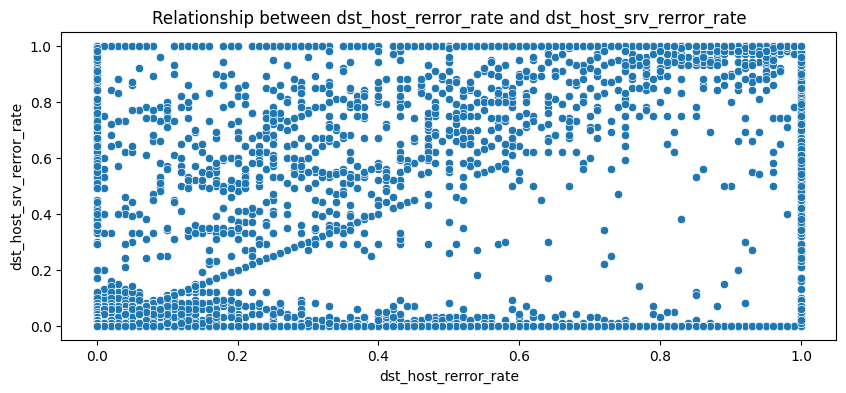

In [ ]:
# Scatter plot for dst_host_rerror_rate vs dst_host_srv_rerror_rate
plt.figure(figsize=(10, 4))
sns.scatterplot(x='dst_host_rerror_rate', y='dst_host_srv_rerror_rate', data=train_data)
plt.title('Relationship between dst_host_rerror_rate and dst_host_srv_rerror_rate')
plt.xlabel('dst_host_rerror_rate')
plt.ylabel('dst_host_srv_rerror_rate')
plt.show()

## Classification models

In [ ]:
# Print unique labels in both datasets to identify any differences
print("Unique labels in training data:", train_data['label'].unique())
print("Unique labels in corrected data:", corrected_data['label'].unique())

Unique labels in training data: ['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']
Unique labels in corrected data: ['normal.' 'snmpgetattack.' 'named.' 'xlock.' 'smurf.' 'ipsweep.'
 'multihop.' 'xsnoop.' 'sendmail.' 'guess_passwd.' 'saint.'
 'buffer_overflow.' 'portsweep.' 'pod.' 'apache2.' 'phf.' 'udpstorm.'
 'warezmaster.' 'perl.' 'satan.' 'xterm.' 'mscan.' 'processtable.' 'ps.'
 'nmap.' 'rootkit.' 'neptune.' 'loadmodule.' 'imap.' 'back.' 'httptunnel.'
 'worm.' 'mailbomb.' 'ftp_write.' 'teardrop.' 'land.' 'sqlattack.'
 'snmpguess.']


In [ ]:
train_data['label'].value_counts()

label
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [ ]:
difference = list(filter(lambda x: x not in train_data['label'].unique(), corrected_data['label'].unique()))
difference
len(corrected_data)

311029

In [ ]:
fil_corrected_data = corrected_data[~corrected_data['label'].isin(difference)]
len(fil_corrected_data)

292300

In [ ]:
label_mapping = {
    "normal.": "normal",
    "back." : "dos",
    "buffer_overflow." : "u2r",
    "ftp_write." : "r2l",
    "guess_passwd." : "r2l",
    "imap." : "r2l",
    "ipsweep." : "probe",
    "land." : "dos",
    "loadmodule." : "u2r",
    "multihop." : "r2l",
    "neptune." : "dos",
    "nmap." : "probe",
    "perl.": "u2r",
    "xperl." : "u2r",
    "phf." : "r2l",
    "pod." : "dos",
    "portsweep." : "probe",
    "rootkit." : "u2r",
    "satan." : "probe",
    "smurf." : "dos",
    "spy." : "r2l",
    "teardrop." : "dos",
    "warezclient." : "r2l",
    "warezmaster." : "r2l"
}

# Correct the labels in the corrected test data using the mapping
train_data['label'] = train_data['label'].replace(label_mapping)
fil_corrected_data['label'] = fil_corrected_data['label'].replace(label_mapping)

<ipython-input-44-fe8d572f0846>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_corrected_data['label'] = fil_corrected_data['label'].replace(label_mapping)


In [ ]:
fil_corrected_data['label'].value_counts()

label
dos       223298
normal     60593
r2l         5993
probe       2377
u2r           39
Name: count, dtype: int64

In [ ]:
encoder = LabelEncoder()
train_data['protocol_type'] = encoder.fit_transform(train_data['protocol_type'])
train_data['service'] = encoder.fit_transform(train_data['service'])
train_data['flag'] = encoder.fit_transform(train_data['flag'])
train_data['label'] = encoder.fit_transform(train_data['label'])


fil_corrected_data['protocol_type'] = encoder.fit_transform(fil_corrected_data['protocol_type'])
fil_corrected_data['service'] = encoder.fit_transform(fil_corrected_data['service'])
fil_corrected_data['flag'] = encoder.fit_transform(fil_corrected_data['flag'])
fil_corrected_data['label'] = encoder.fit_transform(fil_corrected_data['label'])

In [ ]:
num_columns = ["duration","src_bytes", "dst_bytes","land","wrong_fragment",
    "urgent","hot","num_failed_logins", "logged_in","num_compromised","root_shell",
    "su_attempted","num_root", "num_file_creations","num_shells","num_access_files",
    "num_outbound_cmds", "is_host_login","is_guest_login","count","srv_count",
    "serror_rate", "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]

data_num = [col for col in num_columns if col in train_data.columns]

In [ ]:
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
train_data[num_columns] = scaler.fit_transform(train_data[num_columns])


fil_corrected_data[num_columns] = scaler.transform(fil_corrected_data[num_columns])

<ipython-input-49-0e8b8a5531d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_corrected_data[num_columns] = scaler.transform(fil_corrected_data[num_columns])


In [ ]:
num_columns.extend(['protocol_type','service','flag'])

In [ ]:
train_data['flag'].value_counts()

flag
9     378440
5      87007
1      26875
4        903
2        579
10       107
6         57
7         24
3         11
8         10
0          8
Name: count, dtype: int64

In [ ]:
train_data[num_columns]['flag'].value_counts()

flag
9     378440
5      87007
1      26875
4        903
2        579
10       107
6         57
7         24
3         11
8         10
0          8
Name: count, dtype: int64

In [ ]:
# Separate features and labels
X_train, y_train = train_data[num_columns], train_data['label']
X_test, y_test = fil_corrected_data[num_columns], fil_corrected_data['label']

##K-nn

In [ ]:
random_state = 42
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [7, 10],
    'weights': ['uniform'],
    'metric': ['euclidean']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

y_pred_knn = grid_search.predict(X_test)
report = classification_report(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)
best_params_knn = grid_search.best_params_

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

precision, recall, fscore, support = precision_recall_fscore_support(y_test_encoded, y_pred_knn)

unique_classes = np.unique(y_test_encoded)
class_labels = label_encoder.inverse_transform(unique_classes)

recall_df = pd.DataFrame(recall, index=class_labels, columns=['KNN Recall'])
precision_df = pd.DataFrame(precision, index=class_labels, columns=['KNN Precision'])


Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [ ]:
print("Best parameters found by GridSearchCV:", best_params_knn)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nAccuracy Score:", accuracy)

# Calculate the time taken to fit the model and print it
time_to_fit = end_time - start_time
print("\nTime taken to fit the model:", time_to_fit, "seconds")

# Print the recall and precision dataframes
print("\nRecall scores for each class:")
print(recall_df)
print("\nPrecision scores for each class:")
print(precision_df)

Best parameters found by GridSearchCV: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    223298
           1       0.92      0.98      0.95     60593
           2       0.68      0.87      0.76      2377
           3       0.99      0.15      0.26      5993
           4       0.78      0.46      0.58        39

    accuracy                           0.98    292300
   macro avg       0.87      0.69      0.71    292300
weighted avg       0.98      0.98      0.97    292300


Confusion Matrix:
 [[223202     23     73      0      0]
 [    64  59621    899      4      5]
 [    14    292   2071      0      0]
 [     1   5096      2    894      0]
 [     0     15      0      6     18]]

Accuracy Score: 0.9777830995552514

Time taken to fit the model: 3181.1259438991547 seconds

Recall scores for each class:
   KNN Recall
0    0.999570
1    0.983959
2    0

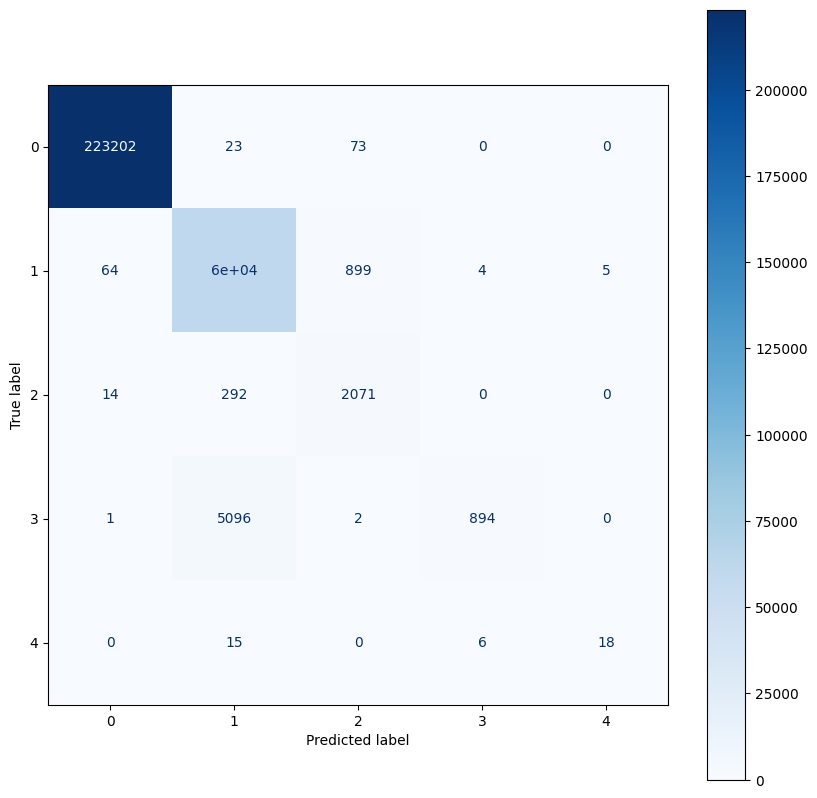

Confusion Matrix:
[[223202     23     73      0      0]
 [    64  59621    899      4      5]
 [    14    292   2071      0      0]
 [     1   5096      2    894      0]
 [     0     15      0      6     18]]


In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

##Random Forest

In [ ]:
random_state = 42

rf = RandomForestClassifier(random_state=random_state)
param_grid_rf = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [10, 20],       # Maximum depth of each tree
    'min_samples_split': [2, 5], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]   # Minimum number of samples required to be at a leaf node
}

# Setup GridSearchCV to find the best parameters
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=1)

# Measure the time it takes to fit the model
start_time_rf = time.time()
grid_search_rf.fit(X_train, y_train)
end_time_rf = time.time()

# Predict the target on the testing set
y_pred_rf = grid_search_rf.predict(X_test)

# Classification report and confusion matrix
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
best_params_rf = grid_search_rf.best_params_

print("Best parameters found for Random Forest:", best_params_rf)
print("Classification Report for Random Forest:\n", report_rf)
print("Confusion Matrix for Random Forest:\n", conf_matrix_rf)
print("Accuracy Score for Random Forest:", accuracy_rf)

# Store the results in a dictionary
results_rf = {
    'random_forest': {
        'time_to_fit': end_time_rf - start_time_rf,
        'accuracy': accuracy_rf,
    }
}

# Calculate precision, recall, fscore, and support for each class
precision_rf, recall_rf, fscore_rf, support_rf = precision_recall_fscore_support(y_test, y_pred_rf)

label_encoder_rf = LabelEncoder()
y_train_encoded_rf = label_encoder_rf.fit_transform(y_train)
y_test_encoded_rf = label_encoder_rf.transform(y_test)

class_labels_rf = label_encoder_rf.inverse_transform(np.unique(y_test_encoded_rf))

recall_df_rf = pd.DataFrame(recall_rf, index=class_labels_rf, columns=['Random Forest Recall'])
precision_df_rf = pd.DataFrame(precision_rf, index=class_labels_rf, columns=['Random Forest Precision'])

# Print the recall and precision dataframes
print("\nRecall scores for each class with Random Forest:")
print(recall_df_rf)
print("\nPrecision scores for each class with Random Forest:")
print(precision_df_rf)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    223298
           1       0.91      1.00      0.95     60593
           2       0.91      1.00      0.95      2377
           3       0.99      0.03      0.07      5993
           4       0.67      0.10      0.18        39

    accuracy                           0.98    292300
   macro avg       0.90      0.63      0.63    292300
weighted avg       0.98      0.98      0.97    292300

Confusion Matrix for Random Forest:
 [[223280      7     11      0      0]
 [    54  60318    220      0      1]
 [     3      6   2368      0      0]
 [     0   5785      0    207      1]
 [     0     33      0      2      4]]
Accuracy Score for Random Forest: 0.9790523434827232


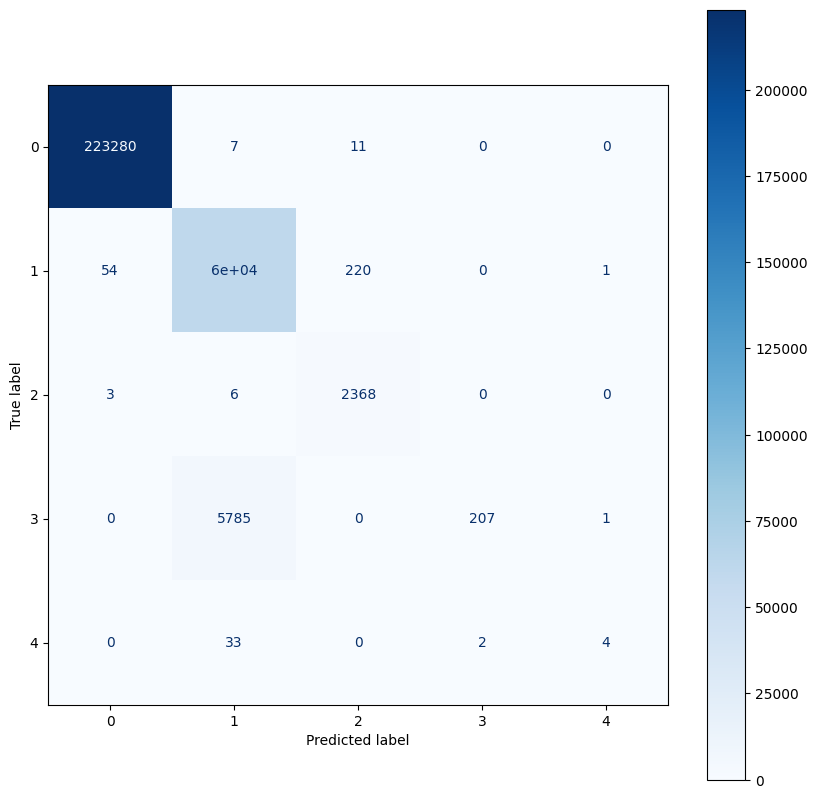

Confusion Matrix:
[[223280      7     11      0      0]
 [    54  60318    220      0      1]
 [     3      6   2368      0      0]
 [     0   5785      0    207      1]
 [     0     33      0      2      4]]


In [ ]:
# Display the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=class_labels_rf)
fig, ax = plt.subplots(figsize=(10, 10))
disp_rf.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_rf)

## Neural network

In [ ]:
# Set random seed for reproducibility
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)

# Define the neural network model
model = Sequential([
    Dense(12, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer with 12 nodes
    Dense(8, activation='relu'),                               # Second hidden layer with 8 nodes
    Dense(1, activation='sigmoid')                             # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/50
49403/49403 [==============================] - 141s 3ms/step - loss: -1498.0734 - accuracy: 0.9774
Epoch 2/50
49403/49403 [==============================] - 141s 3ms/step - loss: -22781.8164 - accuracy: 0.9771
Epoch 3/50
49403/49403 [==============================] - 151s 3ms/step - loss: -97862.3359 - accuracy: 0.9769
Epoch 4/50
49403/49403 [==============================] - 135s 3ms/step - loss: -262024.7031 - accuracy: 0.9768
Epoch 5/50
49403/49403 [==============================] - 134s 3ms/step - loss: -549672.5000 - accuracy: 0.9769
Epoch 6/50
49403/49403 [==============================] - 139s 3ms/step - loss: -995651.6250 - accuracy: 0.9768
Epoch 7/50
49403/49403 [==============================] - 139s 3ms/step - loss: -1629819.6250 - accuracy: 0.9767
Epoch 8/50
49403/49403 [==============================] - 129s 3ms/step - loss: -2494696.7500 - accuracy: 0.9768
Epoch 9/50
49403/49403 [==============================] - 135s 3ms/step - loss: -3617205.7500 - accuracy: 

9135/9135 [==============================] - 16s 2ms/step


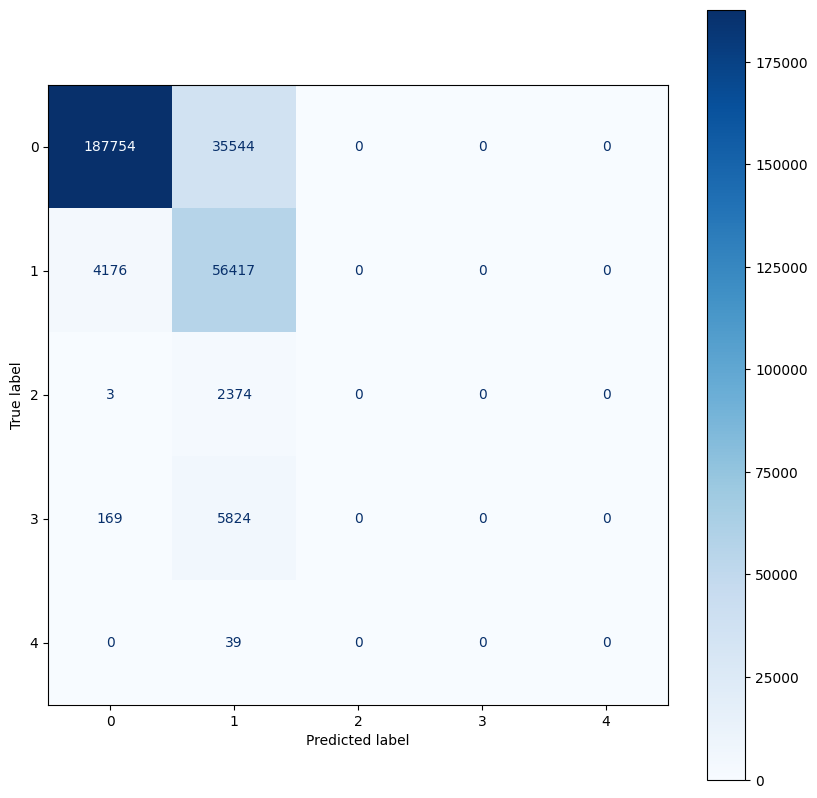

Confusion Matrix:
[[187754  35544      0      0      0]
 [  4176  56417      0      0      0]
 [     3   2374      0      0      0]
 [   169   5824      0      0      0]
 [     0     39      0      0      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90    223298
           1       0.56      0.93      0.70     60593
           2       0.00      0.00      0.00      2377
           3       0.00      0.00      0.00      5993
           4       0.00      0.00      0.00        39

    accuracy                           0.84    292300
   macro avg       0.31      0.35      0.32    292300
weighted avg       0.86      0.84      0.84    292300

Accuracy Score: 0.8353438248374957


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Predict the target on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Compute the confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp_nn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nn)
fig, ax = plt.subplots(figsize=(10, 10))
disp_nn.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_nn)

# Print the classification report
report_nn = classification_report(y_test, y_pred)
print("Classification Report:")
print(report_nn)

# Print the accuracy
accuracy_nn = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy_nn)